In [1]:
from Controller import *

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
def preprocess_and_show(img, state):
    hsv_image = preprocess(img, state)
    img = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.show()
    
def show(img):
    plt.imshow(img)
    plt.title(title)
    plt.show()
    
def show_lines_on_image(img, lines, state):
    hsv_image = preprocess(img, state)
    temp_img = cv2.cvtColor(hsv_image.copy(), cv2.COLOR_HSV2RGB)
    for line in lines:
        if line is not None:
            x1, y1, x2, y2 = line[0]
            cv2.line(temp_img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    show(temp_img)

In [3]:
def get_next_action_from_controller(map_name, curr_pos, observation, state):
    controller = Controller(map_name)
    while (controller.plan.get_current_goal()[0] is not None) and (controller.plan.get_current_goal()[0]!=curr_pos):
        controller.plan.mark_current_goal_done()
    info = {'curr_pos':curr_pos}
    controller.state = state
    return controller.get_next_action(observation, info)

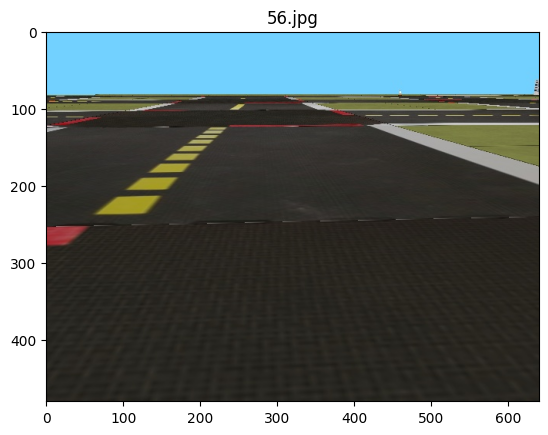

In [17]:
path = "observations_test"
title = "56.jpg"
state = State.TURNING
img = cv2.cvtColor(cv2.imread(os.path.join(path, title)), cv2.COLOR_BGR2RGB)
show(img)

[[130  85 204   3]] [[499   1 637  48]] None


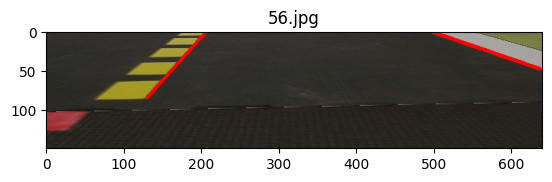

In [18]:
mode = get_mode_from_state(state)

yellow, white, red = get_lane_lines(img, state)
print(yellow, white, red)

edges = get_edges(preprocess(img, state), color="white", blur=True)
lines = get_lines_in_image(edges)

# show(edges)
#show_lines_on_image(img, lines, state) 

show_lines_on_image(img, [yellow, white, red], state)

In [19]:
d_est = get_d_est(yellow, white, mode)
heading = get_heading(yellow, white)

if state == State.IN_LANE_USING_RED:
    heading = get_heading_from_red_line(red) 

k_p, k_d = get_pid_params_for(state)
steering = k_p * d_est + k_d * heading
speed = get_speed(steering)

print(k_p, k_d)
print("d_est = ", d_est)
print("heading = ", heading, ", and in degrees = ", np.degrees(heading))
print("steering = ", steering)
print("speed = ", speed)

0.125 12.5
d_est =  -2.0
heading =  -0.4537856055185257 , and in degrees =  -26.0
steering =  -5.922320068981572
speed =  0.79


In [16]:
if yellow is not None: 
    print("yellow_slope:", np.degrees(np.arctan(slope(yellow))) )
    print("yellow_distance:", get_distance_from_line(yellow, mode))
if white is not None: 
    print("white_slope:", np.degrees(np.arctan(slope(white))))
    print("white_distance:", get_distance_from_line(white, mode))
if red is not None:
    print("red_slope:", np.degrees(np.arctan(slope(red))) )
    

# print(np.degrees(np.arctan(slope(red))))
# print(np.degrees(np.arctan((-1/slope(red)))))
#(get_distance_from_line(yellow, mode) - get_distance_from_line(white, mode))/2
#np.degrees(np.arctan(slope(yellow))) - 90 + DEGREES_OFFSET
#get_distance_from_line(yellow, mode) - one_side_distance_offset(mode)

white_slope: 25.994015802097834
white_distance: 335.0
red_slope: -1.1852608185815374


In [ ]:
for line in lines:
#for line in filter_outlier_lines(lines):
    print(line, np.around(np.degrees(np.arctan(slope(line)))), get_distance_from_line(line, mode))
    show_lines_on_image(img, [line], state) 

In [ ]:
slopes = [abs(np.around(np.degrees(np.arctan(slope(line))))) for line in lines]
mean = np.mean(slopes)
std = np.std(slopes)
print(mean, std)
print(min(2 * std, 15))

In [ ]:
filtered_lines = [line for line in lines if (abs(mean - abs(np.around(np.degrees(np.arctan(slope(line)))))) <= min(2 * std, 15))]

In [ ]:
filtered_lines

In [ ]:
(np.degrees(np.arctan(slope(yellow))) + np.degrees(np.arctan(slope(white)))) + 3